#Theoretical:

**1. What does R-squared represent in a regression model?**

->R-squared measures the proportion of variance in the dependent variable explained by the independent variables. It ranges from 0 to 1

**2. What are the assumptions of linear regression?**

->Linearity: Relationship between features and target is linear.

Independence: Observations are independent.

Homoscedasticity: Constant variance of residuals.

Normality of residuals: Errors are normally distributed.

No multicollinearity: Features are not highly correlated.

**3. Difference between R-squared and Adjusted R-squared?**

->R-squared: Measures how much variance in the target is explained by the model.

Adjusted R-squared: Adjusts R² for the number of predictors, penalizing overfitting from irrelevant features.

**4. Why do we use Mean Squared Error (MSE)?**

->MSE penalizes larger errors more than smaller ones, making it sensitive to significant deviations, which is useful during model training.

**5. What does an Adjusted R-squared value of 0.85 indicate?**

->It means 85% of the variance in the target variable is explained by the model, adjusting for the number of predictors used. Indicates a very good fit.

6. How do we check for normality of residuals in linear regression:
Use? **bold text**

->Histogram of residuals.

Q-Q plot (quantile-quantile plot).

Shapiro-Wilk or Kolmogorov–Smirnov test for statistical testing.

**7. What is multicollinearity, and how does it impact regression?**

->It occurs when predictors are highly correlated.

Leads to unstable coefficients, making it hard to determine the true effect of each variable.

**8. What is Mean Absolute Error (MAE):**

->The average absolute difference between actual and predicted values.

Less sensitive to outliers than MSE.

**9. Benefits of using an ML pipeline:**

->Cleaner code and reproducibility.

Automatically handles data preprocessing + modeling.

Helps with cross-validation, grid search, and deployment.

**10. Why is RMSE more interpretable than MSE:**

->RMSE is in the same units as the target variable, while MSE is in squared units, making RMSE easier to interpret.

**11. What is pickling in Python, and how is it useful in ML:**

->Pickling is serializing a Python object (like a model) to a file.

Useful for saving and loading trained ML models without retraining.

**12. What does a high R-squared value mean?**

->The model explains a large proportion of the variance in the target variable.

But it doesn't always mean the model is good—check residuals and assumptions too.

**13. What happens if linear regression assumptions are violated:**

->Violating assumptions can lead to:

Biased coefficients

Inaccurate predictions

Misleading statistical tests

**14. How can we address multicollinearity in regression:**

->Use Variance Inflation Factor (VIF) to detect it.

Apply:

Feature removal

PCA (dimensionality reduction)

Ridge regression (regularization)

**15. How can feature selection improve model performance?**

->Removes irrelevant/noisy variables.

Reduces overfitting, improves interpretability, and enhances generalization.

**16. How is Adjusted R-squared calculated?**

->Adjusted
𝑅
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
𝑛
−
𝑘
−
1
)
Adjusted R
2
 =1−(
n−k−1
(1−R
2
 )(n−1)
​
 )
Where:

𝑅
2
R
2
  = R-squared

𝑛
n = number of observations

𝑘
k = number of predictors

**17. Why is MSE sensitive to outliers:**

->MSE squares errors, so large errors (from outliers) have disproportionate impact.

**18. What is the role of homoscedasticity in linear regression:**

->Ensures that residuals have constant variance.

If violated (heteroscedasticity), it can lead to biased standard errors and invalid statistical inferences.

**19. What is Root Mean Squared Error (RMSE):**

->Square root of MSE. Measures average magnitude of error in the same units as the target.

**20. Why is pickling considered risky:**

->Pickled files can execute arbitrary code when unpickled.

Can be a security risk if the file comes from an untrusted source.

**21. Alternatives to pickling for saving ML models?**

->joblib: More efficient for large NumPy arrays.

ONNX, HDF5 (for Keras), PMML, or skops

Use cloud-based model registries (e.g., MLflow, SageMaker)

**22. What is heteroscedasticity, and why is it a problem?**

->Non-constant variance of residuals.

Violates linear regression assumptions → unreliable confidence intervals and p-values.

**23. How can interaction terms enhance a regression model’s predictive power?**

->They capture combined effects of two variables that aren't apparent individually.

Useful when one variable modifies the effect of another.



# practical questions

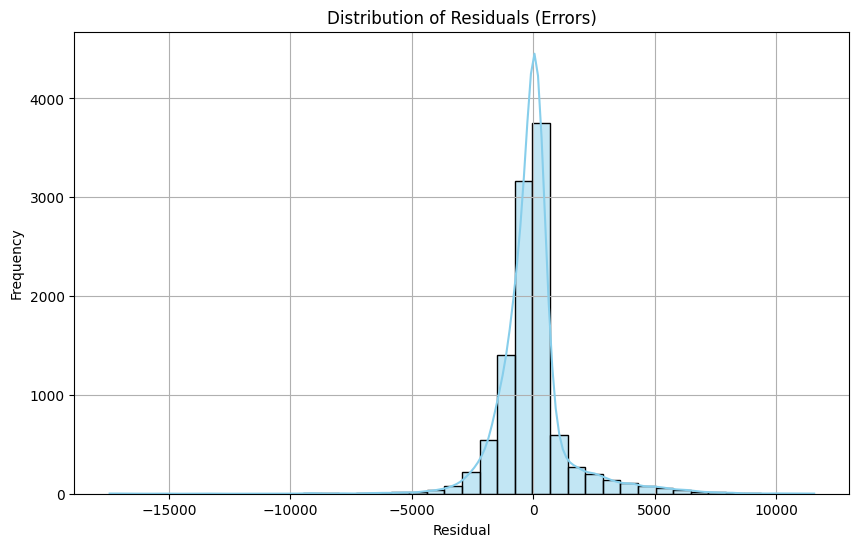

In [2]:
#1 Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression modelusing Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select relevant numeric features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

# Drop rows with missing values (if any)
diamonds = diamonds.dropna()

# Define X and y
X = diamonds[features]
y = diamonds[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and compute residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=40, kde=True, color='skyblue')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [1]:
#2 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and RootMean Squared Error (RMSE) for a linear regression model.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Sample data (you can replace this with your own dataset)
# Generating synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 0.6537
Mean Absolute Error (MAE): 0.5913
Root Mean Squared Error (RMSE): 0.8085


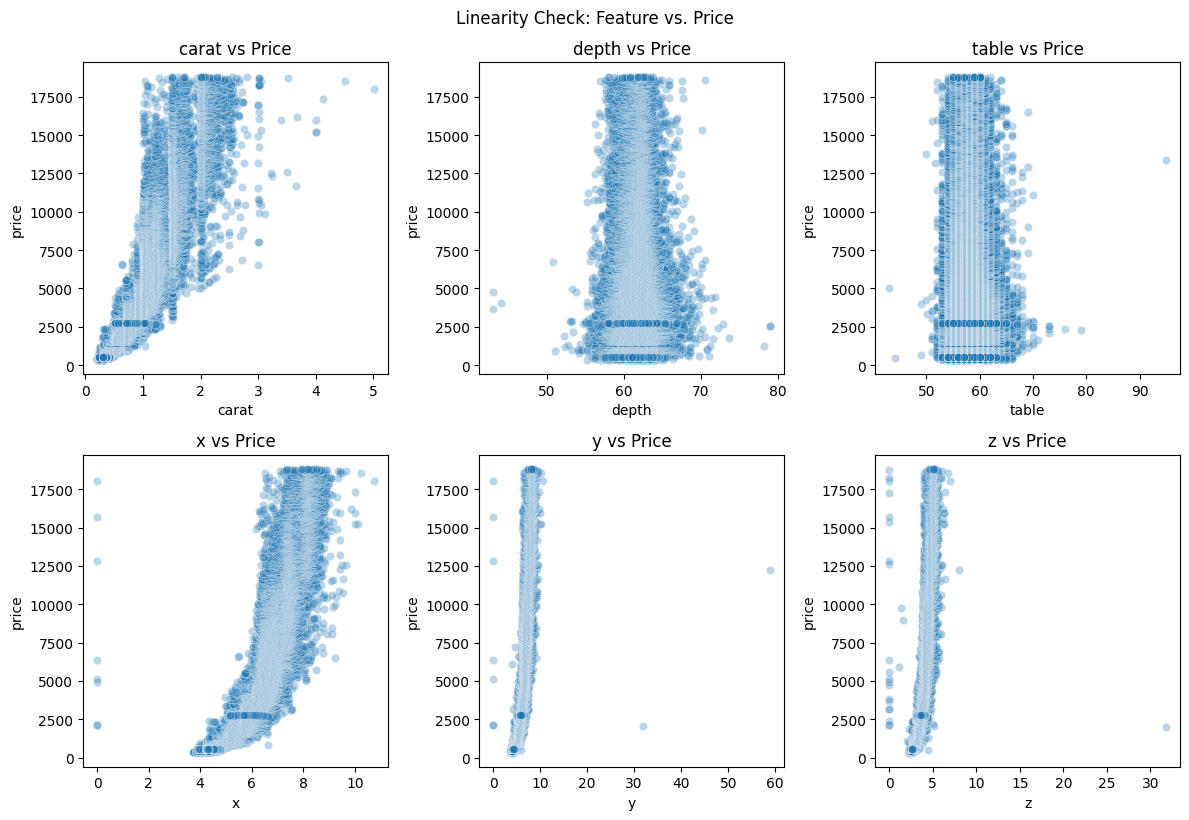

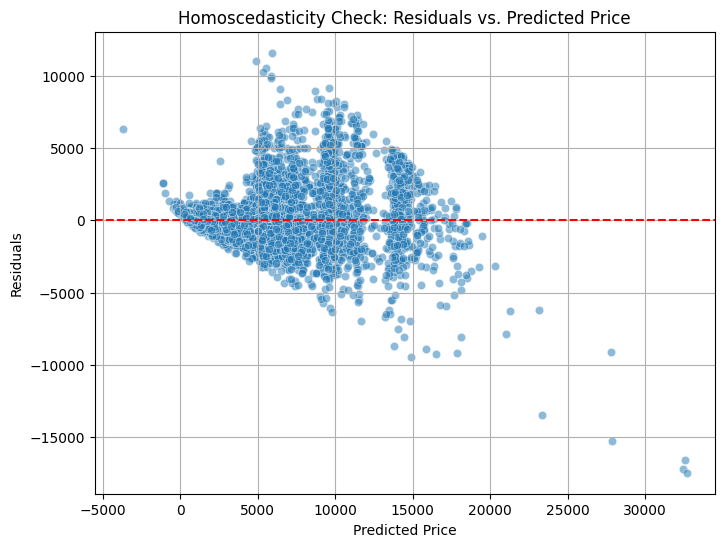

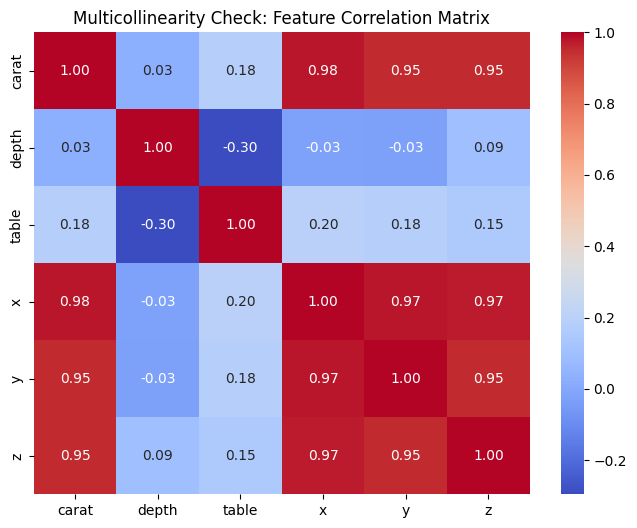

In [3]:
#3 Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Select numeric features
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

# Drop any missing values
diamonds = diamonds.dropna()

# Prepare data
X = diamonds[features]
y = diamonds[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# ------------------------------
# 1. Linearity Check (scatter plots)
# ------------------------------
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=diamonds[feature], y=diamonds[target], alpha=0.3)
    plt.title(f'{feature} vs Price')
plt.tight_layout()
plt.suptitle("Linearity Check: Feature vs. Price", y=1.02)
plt.show()

# ------------------------------
# 2. Homoscedasticity Check (residuals vs. predicted)
# ------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs. Predicted Price")
plt.grid(True)
plt.show()

# ------------------------------
# 3. Multicollinearity Check (correlation matrix)
# ------------------------------
plt.figure(figsize=(8, 6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multicollinearity Check: Feature Correlation Matrix")
plt.show()


In [4]:
#4  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Select numeric features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

# Prepare data
X = diamonds[features]
y = diamonds[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model in a pipeline with StandardScaler
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Linear Regression
R² Score: 0.8590
Mean Squared Error (MSE): 2242178.90
Root Mean Squared Error (RMSE): 1497.39

Ridge Regression
R² Score: 0.8590
Mean Squared Error (MSE): 2242190.28
Root Mean Squared Error (RMSE): 1497.39

Lasso Regression
R² Score: 0.8590
Mean Squared Error (MSE): 2242223.86
Root Mean Squared Error (RMSE): 1497.41

Decision Tree
R² Score: 0.8781
Mean Squared Error (MSE): 1938498.33
Root Mean Squared Error (RMSE): 1392.30

Random Forest
R² Score: 0.8804
Mean Squared Error (MSE): 1901096.41
Root Mean Squared Error (RMSE): 1378.80


In [6]:
#5 Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
tips = sns.load_dataset('tips')

# Define feature and target
X = tips[['total_bill']]  # Independent variable (must be 2D)
y = tips['tip']           # Dependent variable

# Train-test split (optional, for generalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print model parameters
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))


Coefficient (slope): 0.10696370685268658
Intercept: 0.925235558557056
R² Score: 0.5449381659234664


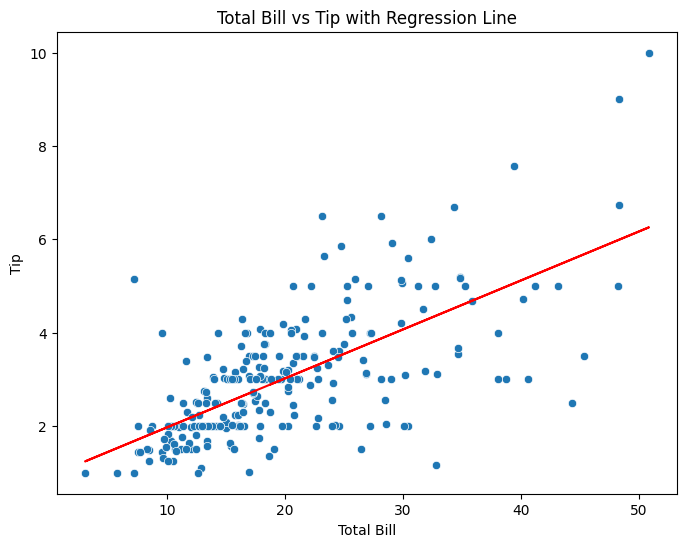

In [5]:
#6 Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load tips dataset
tips = sns.load_dataset("tips")

# Reshape feature for sklearn
X = tips[["total_bill"]]
y = tips["tip"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict and plot
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.plot(tips["total_bill"], y_pred, color='red')
plt.title("Total Bill vs Tip with Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


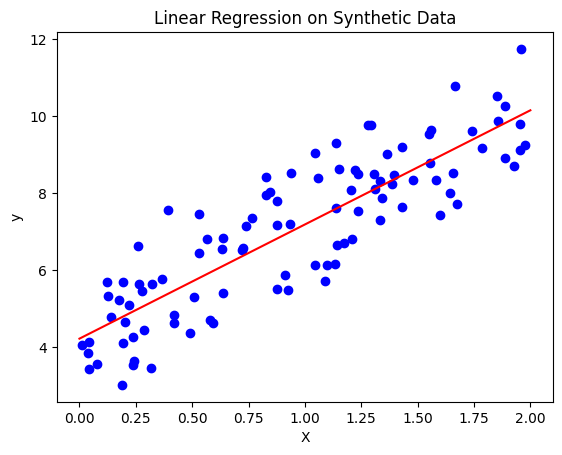

In [7]:
#7  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X_new, y_pred, color='red')
plt.title("Linear Regression on Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [10]:
#8 Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle
from sklearn.linear_model import LinearRegression

# Dummy model training
X = [[0], [1], [2]]
y = [0, 1, 2]
model = LinearRegression().fit(X, y)

# Save with pickle
with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved to 'linear_model.pkl'")


Model saved to 'linear_model.pkl'


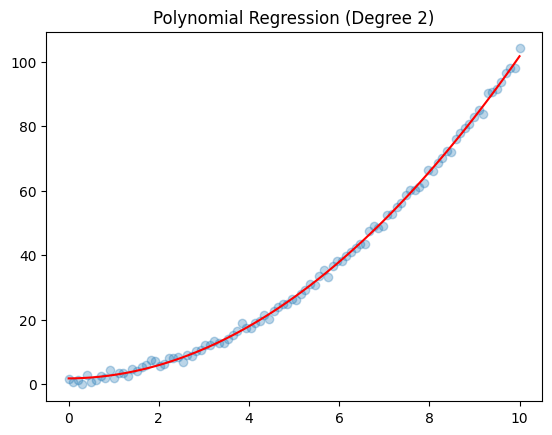

In [12]:
#9  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression  curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + X**2 + np.random.randn(100, 1)

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression().fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.scatter(X, y, alpha=0.3)
plt.plot(X, y_pred, color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


In [13]:
#10 Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 5 + 2 * X + np.random.randn(50, 1)

# Fit model
model = LinearRegression().fit(X, y)
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])



Coefficient: 1.8882830019265522
Intercept: 5.096689274468885


In [14]:
#11 Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

from sklearn.metrics import r2_score

# Data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + 2 * X + X**2 - 0.5 * X**3 + np.random.randn(100, 1)

# Test degrees
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    score = r2_score(y, y_pred)
    print(f"Degree {degree}: R^2 Score = {score:.4f}")



Degree 1: R^2 Score = 0.7858
Degree 2: R^2 Score = 0.9919
Degree 3: R^2 Score = 0.9999
Degree 4: R^2 Score = 0.9999


In [15]:
#12 Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

# Two-feature model
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
model = LinearRegression().fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))


Coefficients: [86.00258028 74.11675411]
Intercept: 0.21635808446095606
R² Score: 0.9897849636638466


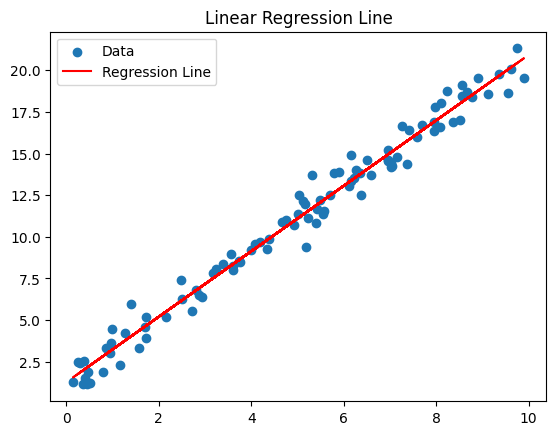

In [16]:
#13  Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

# Generate data
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.title("Linear Regression Line")
plt.legend()
plt.show()


In [20]:
#14  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load diamonds dataset
data = sns.load_dataset("diamonds")[['carat', 'depth', 'table', 'x', 'y', 'z']].dropna()

# Add constant for VIF calculation
X = add_constant(data)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)




  Feature          VIF
0   const  4821.696350
1   carat    21.602712
2   depth     1.496590
3   table     1.143225
4       x    56.187704
5       y    20.454295
6       z    23.530049


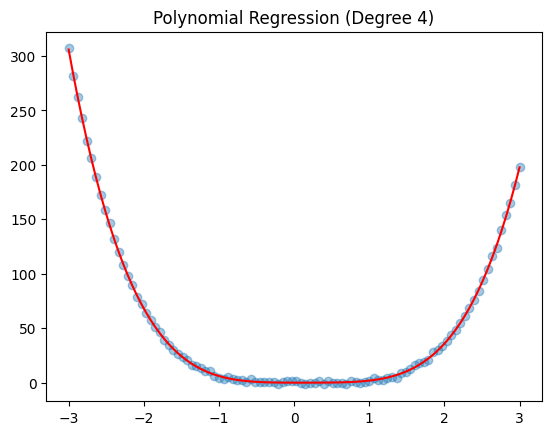

In [21]:
#15  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 3*X**4 - 2*X**3 + X**2 + np.random.randn(100, 1)

# Transform and fit
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.scatter(X, y, alpha=0.4)
plt.plot(X, y_pred, color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()



In [22]:
#16   Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X, y)
print("R² Score:", pipeline.score(X, y))


R² Score: 0.9963795480524085


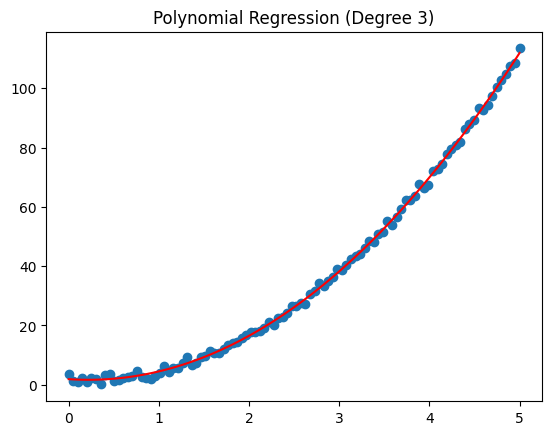

In [34]:
#17 Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

# Similar to 15, but with degree=3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [26]:
#18 Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.




X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=0)
model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.9954354837607747
Coefficients: [44.92514214 86.45627683 98.80644799 11.04319887 42.19897497]
Intercept: -1.9457296340579617


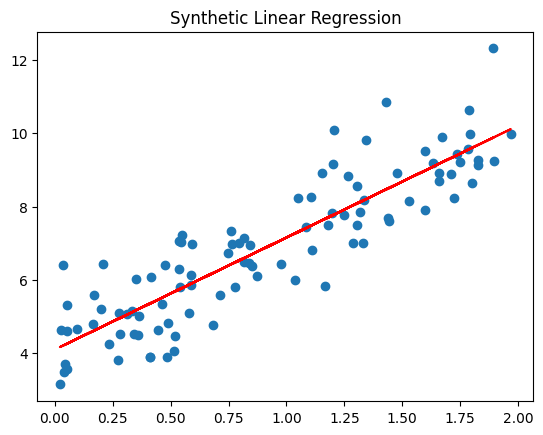

In [27]:
#19  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
model = LinearRegression().fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Synthetic Linear Regression")
plt.show()


In [28]:
#20  Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

X, y = make_regression(n_samples=100, n_features=3, noise=15, random_state=1)
model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R² Score: 0.9848159256315568
Coefficients: [43.81581942 98.78375709 60.17905731]


In [29]:
#21   Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

from joblib import dump, load
model = LinearRegression().fit(X, y)

# Save
dump(model, "model.joblib")

# Load
loaded_model = load("model.joblib")
print("Loaded model R²:", loaded_model.score(X, y))


Loaded model R²: 0.9848159256315568


In [30]:
#22 Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.


tips = sns.load_dataset("tips")
tips_encoded = pd.get_dummies(tips, columns=["sex", "smoker", "day", "time"], drop_first=True)

X = tips_encoded.drop("tip", axis=1)
y = tips_encoded["tip"]

model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))


R² Score: 0.47007812322060794


In [31]:
#23  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

from sklearn.linear_model import Ridge

X, y = make_regression(n_samples=100, n_features=10, noise=20, random_state=0)

lin = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)

print("Linear R²:", lin.score(X, y))
print("Ridge R²:", ridge.score(X, y))
print("Linear Coefs:", lin.coef_)
print("Ridge Coefs:", ridge.coef_)


Linear R²: 0.9945633935370958
Ridge R²: 0.9944737824712374
Linear Coefs: [76.84694464 33.95447661 73.59285012  2.26247411 81.86857901 98.55375252
 94.31117118 58.16264065 96.52360891  2.46890528]
Ridge Coefs: [76.05638195 33.58851376 72.99368716  2.34017428 81.03616162 97.7920181
 93.33899626 57.49247255 95.55810958  2.2913241 ]


In [32]:
#24 . Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

from sklearn.model_selection import cross_val_score
X, y = make_regression(n_samples=100, n_features=4, noise=10, random_state=0)
model = LinearRegression()

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-Validated R² Scores:", scores)
print("Mean R²:", scores.mean())


Cross-Validated R² Scores: [0.99636474 0.99492331 0.97272297 0.99190695 0.99262096]
Mean R²: 0.9897077856785627


In [33]:
#25 5. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

X = np.linspace(0, 5, 100).reshape(-1, 1)
y = 5 * X**2 - 3 * X + 2 + np.random.randn(100, 1)

for degree in range(1, 5):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    r2 = model.score(X_poly, y)
    print(f"Degree {degree} R² Score: {r2:.4f}")


Degree 1 R² Score: 0.9201
Degree 2 R² Score: 0.9992
Degree 3 R² Score: 0.9992
Degree 4 R² Score: 0.9992
